In [2]:
from leaf_pytorch.frontend_helper import Leaf
import torch

In [12]:
fe = Leaf(n_filters=128)
x = torch.randn(1, 1, 16000 * 7)
print(x.shape)
feat = fe(x)
print(feat.shape)
# print(feat[0][1])

feat_ = feat.squeeze().detach().numpy()
feat_.shape

torch.Size([128, 2])
torch.Size([1, 1, 112000])
torch.Size([1, 128, 700])


(128, 700)

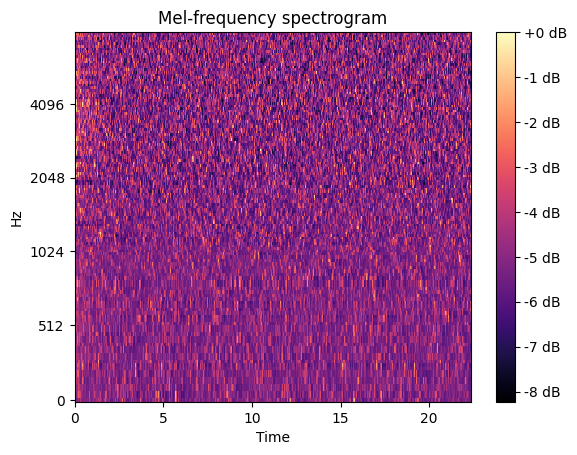

In [13]:
import numpy as np
import librosa.display


def Visualize_the_Mel_Frequency_Spectrogram_series(S, sr):
    """
    Display of mel-frequency spectrogram coefficients, with custom
    arguments for mel filterbank construction (default is fmax=sr/2):
    :param S :  np.ndarray [shape=(..., n_mels, t)] Mel spectrogram
    """
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()


Visualize_the_Mel_Frequency_Spectrogram_series(S=feat_, sr=16000)

In [14]:
wav_path1 = r"E:\Datasets\IEMOCAP\raw_unzip\Session5\sentences\wav\Ses05F_impro04\Ses05F_impro04_F040.wav"

In [15]:

y, sr = librosa.load(wav_path1, sr=16000)
y_tensor = torch.as_tensor(y).unsqueeze(0)
y_tensor.shape

torch.Size([1, 23199])

In [16]:
import matplotlib.pyplot as plt


def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    # require waveform [1,sample_points] and tensor
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c + 1}")
    figure.suptitle(title)
    plt.show(block=False)

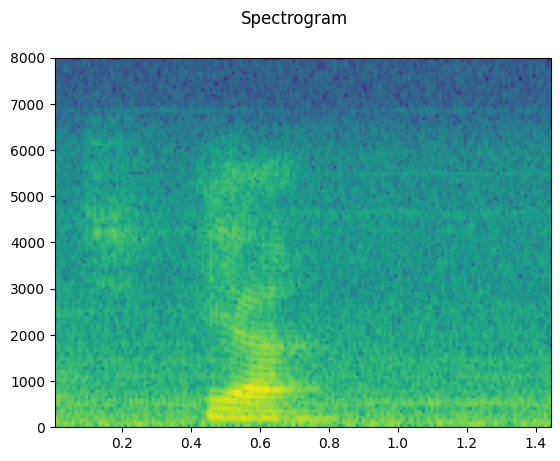

In [17]:
plot_specgram(y_tensor, sample_rate=16000)

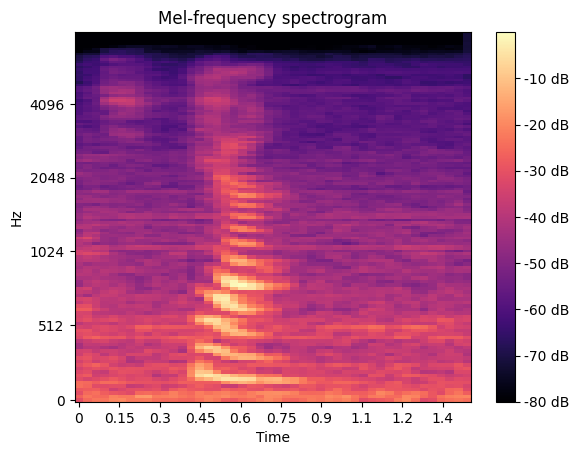

In [18]:
Visualize_the_Mel_Frequency_Spectrogram_series(S=librosa.feature.melspectrogram(y=y, sr=sr), sr=sr)

In [22]:
y_tensor.shape

torch.Size([1, 23199])

torch.Size([128, 2])


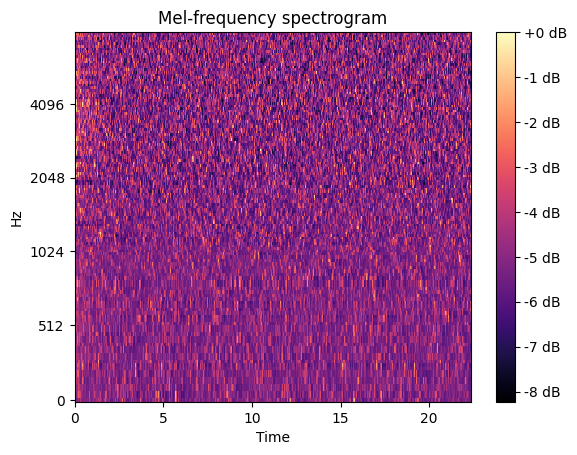

In [30]:
leaf = Leaf(n_filters=128)
y_for_leaf = y_tensor.unsqueeze(0)
feat_leaf = leaf(y_for_leaf)
feat_leaf = feat.squeeze(0).detach().numpy()
Visualize_the_Mel_Frequency_Spectrogram_series(S=feat_leaf, sr=16000)